# TP 5: Algèbre linéaire et codes

Dans la suite, on travaille modulo 2. Il faudra donc utiliser les fonctions du cours qui permettent de calculer modulo 2 des listes ou des vecteurs.

## 1. Distance et poinds de Hamming

Pour $x$ et $y$ éléments de $\{0,1\}$, on définit la distance de Hamming par: 
$$d(x,y)=\left\{
\begin{array}{ll}
1&\mbox{si } x\neq y\\
0&\mbox{si } x=y
\end{array}
\right.$$

On étend cette distance aux vecteurs binaires de dimension $n$ par:
$$d_H(x,y)=\sum_{i=1}^n d(x_i,y_i)$$

Intuitivement, la distance de Hamming compte le nombre de positions où les 2 vecteurs diffèrent

1. Écrivez une fonction `Hamming` qui calcule la distance de Hamming entre deux vecteurs binaires de même longueur

In [1]:
from sympy import *
from sympy import Matrix
import itertools 
init_printing()

In [37]:
def Hamming(x,y):
    n = len(x)
    def H(x,y) : 
        if x != y : return 1
        return 0
    return sum(H(x[i],y[i]) for i in range(n))

In [19]:
Hamming([1,1,1],[0,0,0])

Une fonction utile pour les codes est celle qui compte la distance de Hamming au vecteur nul, appelée poids de Hamming et notée $w$: $$w(x)=d_H(0,x)$$

2. Ecrivez une fonction `poids` qui calcule le poids de Hamming d'un vecteur binaire.

In [39]:
def poids(x):
    return Hamming([0,0,0],x)
poids([0,1,2,8,0])

La distance minimale d'un code est le poids minimal des mots (non nuls) du code. Expliquez comment obtenir la liste des mots du code sans le mot nul (pensez à la différence de deux ensembles).

In [12]:
 def codp_N_nul(C):
        return [i for i in C if i!=(0,0,0)] 

3. Sur le code $C=\{(0, 0, 0),(1, 0, 1), (0, 1, 1), (1, 1, 0)\}$, calculez la distance minimale.

In [20]:
C=codp_N_nul([(0,0,0),(1,0,1),(0,1,1),(1,1,0)])

def dist_min(C):
    return min([poids(i) for i in C])

dist_min(C)

## 2. Détection ou correction des erreurs

La distance minimale $d(C)$ d'un code $C$ permet de calculer combien d'erreurs peuvent être détectées $e_d$ ou corrigées $e_c$ par les égalités suivantes:
$$\begin{array}
e_d = d(C) -1\\
e_c = \lfloor\frac{d(C)-1}{2}\rfloor
\end{array}$$

1. Quelle est la capacité de détection (ou de correction) du code précédent $C=\{(0, 0, 0),(1, 0, 1), (0, 1, 1), (1, 1, 0)\}$

In [21]:
def correction(C):
    d=dist_min(C)-1
    ec=abs(d/2)
    return ec

correction(C)

## 3. Etude d'un code correcteur d'erreurs

Soit le code engendré par la matrice génératrice $G$

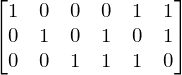

In [22]:
G=Matrix([[1, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 1, 0]])
G

1. Quels sont les mots du code?

In [40]:
M=tuple(itertools.product(*[range(0,2)]*3)) 
def listMod(l):    
    return [i%2 for i in l]
for i in M:
    print(i,'--> ',listMod(list(Matrix(3,1,i).T*G)))

(0, 0, 0) -->  [0, 0, 0, 0, 0, 0]
(0, 0, 1) -->  [0, 0, 1, 1, 1, 0]
(0, 1, 0) -->  [0, 1, 0, 1, 0, 1]
(0, 1, 1) -->  [0, 1, 1, 0, 1, 1]
(1, 0, 0) -->  [1, 0, 0, 0, 1, 1]
(1, 0, 1) -->  [1, 0, 1, 1, 0, 1]
(1, 1, 0) -->  [1, 1, 0, 1, 1, 0]
(1, 1, 1) -->  [1, 1, 1, 0, 0, 0]


2. Quelle est la longueur et la dimension de ce code?

In [69]:
Long_code=6
Dim_code=3

3. Quelle en est la distance minimale?

In [70]:
code =[listMod2(list(Matrix(3,1,i).T*G)) for i in m if listMod2(list(Matrix(3,1,i).T*G))!=[0,0,0,0,0,0]]
dist_min(code)

1

4. Quelle est sa capacité de détection/correction?

In [73]:
correction(code)

0

5. Trouvez sa matrice de contrôle

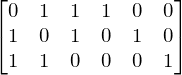

In [24]:
def llistMod(m):
    res=[]    
    n=len(m)    
    for i in m:        
        res.append(listMod(i))    
    return res

M=Matrix(llistMod(G.nullspace()))
M

6. Calculez la table des syndromes

In [26]:
def vecMod(v):    
    return Matrix(listMod(v))

def unitVector(n,i):
    return Matrix([1 if j==i else 0 for j in range(n)])

def syndrome(recu):    
    return vecMod(M*recu)

for i in range(6):    
     print(list(unitVector(6,i)),list(syndrome(unitVector(6,i))))


[1, 0, 0, 0, 0, 0] [0, 1, 1]
[0, 1, 0, 0, 0, 0] [1, 0, 1]
[0, 0, 1, 0, 0, 0] [1, 1, 0]
[0, 0, 0, 1, 0, 0] [1, 0, 0]
[0, 0, 0, 0, 1, 0] [0, 1, 0]
[0, 0, 0, 0, 0, 1] [0, 0, 1]


7. Corrigez (ou non les mots reçus suivants) : $(1,1,0,1,1,0),(1,1,1,0,0,1)$

In [36]:
syndrome(Matrix([1,1,0,1,1,0])).T

In [33]:
syndrome(Matrix([1,1,1,0,0,1])).T 


In [32]:
vecMod(Matrix([1,1,1,0,0,1])+ Matrix([0,0,0,0,0,1])).T


In [35]:
syndrome(x).T